In [1]:
import matplotlib.pyplot as plt 
import numpy as np

In [78]:
print("——————————————————————————主观贝叶斯 EH 的分段线性插值图像构建————————————————————————————————\n")
print("                                       tips: 1. 您需要输入四个变量来构建图像，分别是LS，LN，P(E)，P(H)")
print("                                       tips: 1. LS >= 0, LN>= 0, 0 <= P(E) <= 1, 0 <= P(H) <= 1\n")
ls = float(input("请输入LS： "))
ln = float(input("请输入LN： "))
pe = float(input("请输入P(E) "))
ph = float(input("请输入P(H) "))


——————————————————————————主观贝叶斯 EH 的分段线性插值图像构建————————————————————————————————

                                       tips: 1. 您需要输入四个变量来构建图像，分别是LS，LN，P(E)，P(H)
                                       tips: 1. LS >= 0, LN>= 0, 0 <= P(E) <= 1, 0 <= P(H) <= 1

请输入LS： 3
请输入LN： 0.4
请输入P(E) 0.7
请输入P(H) 0.6


In [79]:
phe = ls * ph / ((ls - 1) * ph + 1)
ph_e = ln * ph / ((ln - 1) * ph + 1)

x1 = np.linspace(0, pe, 20)
x2 = np.linspace(pe, 1, 20)

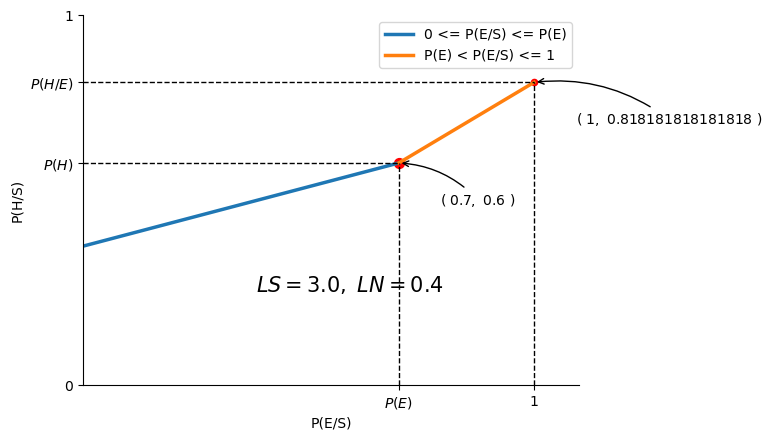

In [81]:
plt.figure()

plt.xlim(0, 1.1)
plt.ylim(0, 1)

ax = plt.gca() # get current axis
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

y1 = ph_e + (ph - ph_e) * x1 / pe
y2 = ph + (phe - ph) * (x2 - pe) / (1 - pe)

plt.plot(x1, y1, label = '0 <= P(E/S) <= P(E)', lw = 2.5)
plt.plot(x2, y2, label = 'P(E) < P(E/S) <= 1', lw = 2.5)

plt.xlabel('P(E/S)')
plt.ylabel('P(H/S)')

plt.plot([pe, pe], [0, ph], 'k--', lw=1)
plt.plot([0, pe], [ph, ph], 'k--', lw=1)
plt.plot([1, 1], [0, phe], 'k--', lw=1)
plt.plot([0, 1], [phe, phe], 'k--', lw=1)

plt.scatter(pe, ph, s=50, color='r')
plt.annotate(r'$(\ {},\ {}\ )$'.format(pe,ph), xy=(pe, ph), xytext=(+30, -30), textcoords='offset points',
             fontsize=10,arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=.2'))

plt.scatter(1, phe, s=20, color='r')
plt.annotate(r'$(\ {},\ {}\ )$'.format(1,phe), xy=(1, phe), xytext=(+30, -30), textcoords='offset points',
             fontsize=10,arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=.2'))

plt.xticks([pe,1], [r'$P(E)$', r'$1$'])
plt.yticks([0, ph, phe, 1], [0, r'$P(H)$', r'$P(H/E)$', r'$1$'])

plt.text(0.8,0.3,r'$LS={},\ LN={}$'.format(ls,ln),fontsize=15,verticalalignment="top",horizontalalignment="right")


plt.legend(loc='best')
plt.show()